# Echo Studio Reviews - Sentiment Analysis

### Importing required libraries

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import string
from textblob import TextBlob
import nltk

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import pickle
import re
from collections import Counter

## Data utilized

I have scrapped the data from amazon website to get the latest reviews to one of the latest amazon product, i.e, "Echo Studio". I have retrieved the data through HTTP requests and processed the data using BeautifulSoup and structured the result into a pandas dataframe

In [74]:
data = pd.read_csv("Echo_Reviews_24.csv")

In [76]:
data.head()

,Name,Stars,Title,Date,Description
0,Boss Barbie,5.0,5.0 out of 5 stars\nExcellent sound quality,22/09/2024,It sounds amazing !
1,RKREJ,5.0,5.0 out of 5 stars\nMANUAL POWER OFF SWITCH TO...,22/09/2024,INSTALLS BY INPUT PLUGThis Way You Don't Have ...
2,JDS,2.0,2.0 out of 5 stars\nDon’t waste your money,22/09/2024,Speakers sound decent enough but these loose i...
3,Ezra,2.0,2.0 out of 5 stars\nDO NOT WASTE YOUR TIME OR ...,20/09/2024,I've gone through 2 of these and have the same...
4,Christopher M. Rumley,5.0,5.0 out of 5 stars\nGreat Sound and classy look,19/09/2024,Went from an echo dot to this. Why did we wait...


## Exploratory Data Analysis

In [79]:
data.isnull().sum()

Name           0
Stars          0
Title          0
Date           0
Description    0
dtype: int64

### Cleaning the title column

In [82]:
data['Title']

0           5.0 out of 5 stars\nExcellent sound quality
1     5.0 out of 5 stars\nMANUAL POWER OFF SWITCH TO...
2            2.0 out of 5 stars\nDon’t waste your money
3     2.0 out of 5 stars\nDO NOT WASTE YOUR TIME OR ...
4       5.0 out of 5 stars\nGreat Sound and classy look
5                   5.0 out of 5 stars\nAwesome Speaker
6         5.0 out of 5 stars\nThis Speaker is the Bomb!
7            1.0 out of 5 stars\nDo not buy known issue
8                      5.0 out of 5 stars\nAlexa studio
9      1.0 out of 5 stars\nNot completely satisfied....
10                       4.0 out of 5 stars\nNice sound
11    2.0 out of 5 stars\nFrecuente pérdida de conec...
12    1.0 out of 5 stars\nThis model alexa is not re...
13          4.0 out of 5 stars\nEverything but a remote
14    1.0 out of 5 stars\nEcho does not connect to S...
15                5.0 out of 5 stars\nSuena tremendo!!!
16                  4.0 out of 5 stars\nVery good sound
17    5.0 out of 5 stars\nMind Blowing Sound and

In [84]:
# Modifying the 'Title' column to remove everything before the first '\n'

data['Title'] = data['Title'].str.split(r'\n').str[1]
data

,Name,Stars,Title,Date,Description
0,Boss Barbie,5.0,Excellent sound quality,22/09/2024,It sounds amazing !
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,22/09/2024,INSTALLS BY INPUT PLUGThis Way You Don't Have ...
2,JDS,2.0,Don’t waste your money,22/09/2024,Speakers sound decent enough but these loose i...
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,20/09/2024,I've gone through 2 of these and have the same...
4,Christopher M. Rumley,5.0,Great Sound and classy look,19/09/2024,Went from an echo dot to this. Why did we wait...
5,William Nylic,5.0,Awesome Speaker,18/09/2024,I purchased this speaker to replace an old ech...
6,CODOM,5.0,This Speaker is the Bomb!,17/09/2024,This speaker is the best stand-alone speaker I...
7,Justin in Florida,1.0,Do not buy known issue,15/09/2024,Do not buy this after a year or so it will bec...
8,Dayana Suarez,5.0,Alexa studio,15/09/2024,Muy buena ! excelente calidad de sonido
9,Gabriel Gachupin,1.0,Not completely satisfied....,15/09/2024,I was expecting to receive an outstanding soun...


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         50 non-null     object 
 1   Stars        50 non-null     float64
 2   Title        50 non-null     object 
 3   Date         50 non-null     object 
 4   Description  50 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.1+ KB


In [88]:
# Converting the "Date" column to Datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         50 non-null     object        
 1   Stars        50 non-null     float64       
 2   Title        50 non-null     object        
 3   Date         50 non-null     datetime64[ns]
 4   Description  50 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.1+ KB


In [92]:
# Renaming the 'Stars' column to 'Rating'
data.rename(columns={'Stars': 'Rating'}, inplace=True)
data

,Name,Rating,Title,Date,Description
0,Boss Barbie,5.0,Excellent sound quality,2024-09-22,It sounds amazing !
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,2024-09-22,INSTALLS BY INPUT PLUGThis Way You Don't Have ...
2,JDS,2.0,Don’t waste your money,2024-09-22,Speakers sound decent enough but these loose i...
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,2024-09-20,I've gone through 2 of these and have the same...
4,Christopher M. Rumley,5.0,Great Sound and classy look,2024-09-19,Went from an echo dot to this. Why did we wait...
5,William Nylic,5.0,Awesome Speaker,2024-09-18,I purchased this speaker to replace an old ech...
6,CODOM,5.0,This Speaker is the Bomb!,2024-09-17,This speaker is the best stand-alone speaker I...
7,Justin in Florida,1.0,Do not buy known issue,2024-09-15,Do not buy this after a year or so it will bec...
8,Dayana Suarez,5.0,Alexa studio,2024-09-15,Muy buena ! excelente calidad de sonido
9,Gabriel Gachupin,1.0,Not completely satisfied....,2024-09-15,I was expecting to receive an outstanding soun...


In [94]:
# Creating a new column 'feedback' where 1 indicates rating 3 or above, and 0 indicates below 3
data['feedback'] = data['Rating'].apply(lambda x: 1 if x >= 3 else 0)
data

,Name,Rating,Title,Date,Description,feedback
0,Boss Barbie,5.0,Excellent sound quality,2024-09-22,It sounds amazing !,1
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,2024-09-22,INSTALLS BY INPUT PLUGThis Way You Don't Have ...,1
2,JDS,2.0,Don’t waste your money,2024-09-22,Speakers sound decent enough but these loose i...,0
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,2024-09-20,I've gone through 2 of these and have the same...,0
4,Christopher M. Rumley,5.0,Great Sound and classy look,2024-09-19,Went from an echo dot to this. Why did we wait...,1
5,William Nylic,5.0,Awesome Speaker,2024-09-18,I purchased this speaker to replace an old ech...,1
6,CODOM,5.0,This Speaker is the Bomb!,2024-09-17,This speaker is the best stand-alone speaker I...,1
7,Justin in Florida,1.0,Do not buy known issue,2024-09-15,Do not buy this after a year or so it will bec...,0
8,Dayana Suarez,5.0,Alexa studio,2024-09-15,Muy buena ! excelente calidad de sonido,1
9,Gabriel Gachupin,1.0,Not completely satisfied....,2024-09-15,I was expecting to receive an outstanding soun...,0


### 1 means "Positive Review" | 0 means "Negative Review"

In [97]:
#Creating a new column 'Description_length' that will contain the length of the string in 'verified_reviews' column

data['Description_length'] = data['Description'].apply(len)
data

,Name,Rating,Title,Date,Description,feedback,Description_length
0,Boss Barbie,5.0,Excellent sound quality,2024-09-22,It sounds amazing !,1,19
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,2024-09-22,INSTALLS BY INPUT PLUGThis Way You Don't Have ...,1,382
2,JDS,2.0,Don’t waste your money,2024-09-22,Speakers sound decent enough but these loose i...,0,127
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,2024-09-20,I've gone through 2 of these and have the same...,0,445
4,Christopher M. Rumley,5.0,Great Sound and classy look,2024-09-19,Went from an echo dot to this. Why did we wait...,1,322
5,William Nylic,5.0,Awesome Speaker,2024-09-18,I purchased this speaker to replace an old ech...,1,414
6,CODOM,5.0,This Speaker is the Bomb!,2024-09-17,This speaker is the best stand-alone speaker I...,1,351
7,Justin in Florida,1.0,Do not buy known issue,2024-09-15,Do not buy this after a year or so it will bec...,0,355
8,Dayana Suarez,5.0,Alexa studio,2024-09-15,Muy buena ! excelente calidad de sonido,1,39
9,Gabriel Gachupin,1.0,Not completely satisfied....,2024-09-15,I was expecting to receive an outstanding soun...,0,613


In [99]:
# Creating a new column for the length of the title called "Title_len"

data['Title_len'] = data['Title'].apply(len)
data

,Name,Rating,Title,Date,Description,feedback,Description_length,Title_len
0,Boss Barbie,5.0,Excellent sound quality,2024-09-22,It sounds amazing !,1,19,23
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,2024-09-22,INSTALLS BY INPUT PLUGThis Way You Don't Have ...,1,382,34
2,JDS,2.0,Don’t waste your money,2024-09-22,Speakers sound decent enough but these loose i...,0,127,22
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,2024-09-20,I've gone through 2 of these and have the same...,0,445,31
4,Christopher M. Rumley,5.0,Great Sound and classy look,2024-09-19,Went from an echo dot to this. Why did we wait...,1,322,27
5,William Nylic,5.0,Awesome Speaker,2024-09-18,I purchased this speaker to replace an old ech...,1,414,15
6,CODOM,5.0,This Speaker is the Bomb!,2024-09-17,This speaker is the best stand-alone speaker I...,1,351,25
7,Justin in Florida,1.0,Do not buy known issue,2024-09-15,Do not buy this after a year or so it will bec...,0,355,22
8,Dayana Suarez,5.0,Alexa studio,2024-09-15,Muy buena ! excelente calidad de sonido,1,39,12
9,Gabriel Gachupin,1.0,Not completely satisfied....,2024-09-15,I was expecting to receive an outstanding soun...,0,613,28


## Analyzing the "Rating" column

In [102]:
# Check for distinct values

print(f"Rating value count: \n{data['Rating'].value_counts()}")

Rating value count: 
Rating
5.0    21
1.0    14
2.0     9
4.0     5
3.0     1
Name: count, dtype: int64


### Rating Distribution in percentage

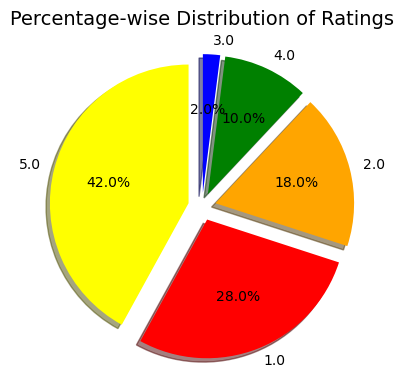

In [130]:
rating_counts = data['Rating'].value_counts()
rating_labels = rating_counts.index
rating_sizes = rating_counts.values
plt.figure(figsize=(6, 4))
plt.pie(rating_sizes, labels=rating_labels, autopct='%1.1f%%', startangle=90, 
        colors=['yellow', 'red', 'orange', 'green', 'blue'], shadow=True, explode=(0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Percentage-wise Distribution of Ratings', fontsize=14)
plt.ylabel('')  
plt.tight_layout()
plt.show()


## Analyzing the "Feedback" column

In [134]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    27
0    23
Name: count, dtype: int64


From the data that we have scraped, there seems to be an almost equal positive and negative feedback for the product

In [139]:
#Let's look at a negative feedback

review_0 = data[data['feedback'] == 0].iloc[1]['Title']
print(review_0)

DO NOT WASTE YOUR TIME OR MONEY


In [143]:
#Now, Let's look at a positive feedback

review_0 = data[data['feedback'] == 1].iloc[0]['Title']
print(review_0)

Excellent sound quality


## Cleaning the text columns for further analysis

Before cleaning the text columns, it's important to understand why text preprocessing is crucial in Natural Language Processing (NLP). Raw text data often contains various elements like punctuation, capitalizations, and common words (stopwords) that do not contribute much to the actual meaning of the text. These elements can introduce noise, making it difficult for models to capture the essential patterns and context.

Cleaning the text helps:

* Improve Model Accuracy: By removing irrelevant parts like punctuation and stopwords, we ensure that the model focuses only on meaningful words.
* Standardize the Data: Converting the text to lowercase and tokenizing ensures uniformity, reducing redundancy (e.g., “Good” and “good” being treated differently).
* Enhance Text Representation: Techniques like stemming and lemmatization bring words to their root forms, which helps in grouping similar words (e.g., "running" and "run") for better analysis.

In [154]:
df = data.copy()

# Function to clean the text
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))      # Removes punctuation
    text = text.lower()     # Converts to lowercase
    tokens = word_tokenize(text)      # Tokenizes the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]      # Removes stopwords
    return ' '.join(tokens)

# Apply the function to the text columns
df['clean_title'] = df['Title'].apply(clean_text)
df['clean_description'] = df['Description'].apply(clean_text)


## Wordcloud vizualizations

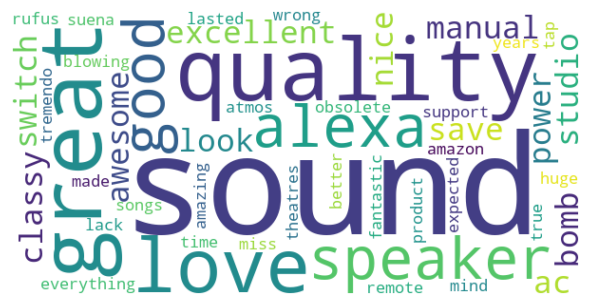

In [218]:
# Word clouds for titles where feedback is 1 (positive)
positive_title_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(
    ' '.join(df[df['feedback'] == 1]['clean_title'])
)
plt.figure(figsize=(6, 4))
plt.imshow(positive_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


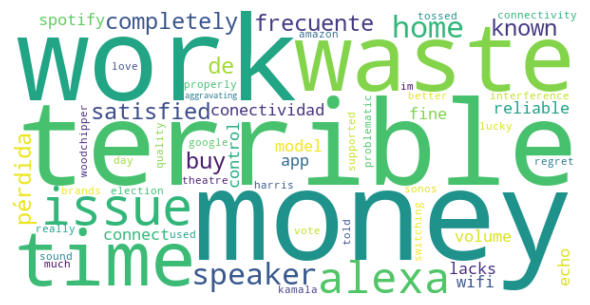

In [214]:
# Word clouds for titles where feedback is 0 (negative)
negative_title_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(
    ' '.join(df[df['feedback'] == 0]['clean_title'])
)

plt.figure(figsize=(6, 4))
plt.imshow(negative_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [160]:
# Analyzing the frequency of words in the cleaned "Description" column.

all_words = ' '.join(df['clean_description']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))

[('sound', 35), ('’', 26), ('amazon', 20), ('speaker', 18), ('alexa', 18), ('echo', 16), ('quality', 15), ('would', 14), ('music', 11), ('speakers', 9)]


In [162]:
# Analyzing the frequency of words in the cleaned "Title" column.

all_words_t = ' '.join(df['clean_title']).split()
word_freq_t = Counter(all_words_t)
print(word_freq_t.most_common(10))

[('sound', 12), ('quality', 4), ('speaker', 4), ('alexa', 4), ('love', 4), ('’', 3), ('money', 3), ('time', 3), ('great', 3), ('terrible', 3)]


### Sentiment Analysis

In [173]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['title_sentiment'] = df['clean_title'].apply(get_sentiment)
df['description_sentiment'] = df['clean_description'].apply(get_sentiment)

# Results
print(df[['clean_title', 'title_sentiment', 'clean_description', 'description_sentiment']].head())


                   clean_title  title_sentiment  \
0      excellent sound quality         0.700000   
1  manual power switch save ac         0.000000   
2                ’ waste money        -0.200000   
3             waste time money        -0.200000   
4      great sound classy look         0.433333   

                                   clean_description  description_sentiment  
0                                     sounds amazing               0.600000  
1  installs input plugthis way dont keep drawing ...               0.083333  
2  speakers sound decent enough loose internet co...               0.097949  
3  ive gone 2 problem connectivity awful yes ive ...              -0.102041  
4  went echo dot wait long volume 10 sound blast ...               0.250000  


### Re-Classifying the sentiment scores to Positive, Negative and Neutral based on Polarity

In [180]:
# Function to classify sentiment based on polarity score
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['title_sentiment_class'] = df['title_sentiment'].apply(classify_sentiment)
df['description_sentiment_class'] = df['description_sentiment'].apply(classify_sentiment)

# Display the classification results
df[['clean_title', 'title_sentiment_class', 'clean_description', 'description_sentiment_class']].head()


,clean_title,title_sentiment_class,clean_description,description_sentiment_class
0,excellent sound quality,Positive,sounds amazing,Positive
1,manual power switch save ac,Neutral,installs input plugthis way dont keep drawing ...,Positive
2,’ waste money,Negative,speakers sound decent enough loose internet co...,Positive
3,waste time money,Negative,ive gone 2 problem connectivity awful yes ive ...,Negative
4,great sound classy look,Positive,went echo dot wait long volume 10 sound blast ...,Positive


### POS Tagging (Parts Of Speech)

In [234]:
# Tokenizing the text
df['tokens'] = df['clean_description'].apply(nltk.word_tokenize)

df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
print(df[['clean_description', 'tokens', 'pos_tags']].head())

                                   clean_description  \
0                                     sounds amazing   
1  installs input plugthis way dont keep drawing ...   
2  speakers sound decent enough loose internet co...   
3  ive gone 2 problem connectivity awful yes ive ...   
4  went echo dot wait long volume 10 sound blast ...   

                                              tokens  \
0                                  [sounds, amazing]   
1  [installs, input, plugthis, way, dont, keep, d...   
2  [speakers, sound, decent, enough, loose, inter...   
3  [ive, gone, 2, problem, connectivity, awful, y...   
4  [went, echo, dot, wait, long, volume, 10, soun...   

                                            pos_tags  
0                    [(sounds, NNS), (amazing, VBG)]  
1  [(installs, NNS), (input, VBD), (plugthis, JJ)...  
2  [(speakers, NNS), (sound, VBP), (decent, JJ), ...  
3  [(ive, JJ), (gone, VBN), (2, CD), (problem, NN...  
4  [(went, VBD), (echo, JJ), (dot, NN), (wait, NN..

In [236]:
df

,Name,Rating,Title,Date,Description,feedback,Description_length,Title_len,clean_title,clean_description,title_sentiment,description_sentiment,title_sentiment_class,description_sentiment_class,tokens,pos_tags
0,Boss Barbie,5.0,Excellent sound quality,2024-09-22,It sounds amazing !,1,19,23,excellent sound quality,sounds amazing,0.700000,0.600000,Positive,Positive,"[sounds, amazing]","[(sounds, NNS), (amazing, VBG)]"
1,RKREJ,5.0,MANUAL POWER OFF SWITCH TO SAVE AC,2024-09-22,INSTALLS BY INPUT PLUGThis Way You Don't Have ...,1,382,34,manual power switch save ac,installs input plugthis way dont keep drawing ...,0.000000,0.083333,Neutral,Positive,"[installs, input, plugthis, way, dont, keep, d...","[(installs, NNS), (input, VBD), (plugthis, JJ)..."
2,JDS,2.0,Don’t waste your money,2024-09-22,Speakers sound decent enough but these loose i...,0,127,22,’ waste money,speakers sound decent enough loose internet co...,-0.200000,0.097949,Negative,Positive,"[speakers, sound, decent, enough, loose, inter...","[(speakers, NNS), (sound, VBP), (decent, JJ), ..."
3,Ezra,2.0,DO NOT WASTE YOUR TIME OR MONEY,2024-09-20,I've gone through 2 of these and have the same...,0,445,31,waste time money,ive gone 2 problem connectivity awful yes ive ...,-0.200000,-0.102041,Negative,Negative,"[ive, gone, 2, problem, connectivity, awful, y...","[(ive, JJ), (gone, VBN), (2, CD), (problem, NN..."
4,Christopher M. Rumley,5.0,Great Sound and classy look,2024-09-19,Went from an echo dot to this. Why did we wait...,1,322,27,great sound classy look,went echo dot wait long volume 10 sound blast ...,0.433333,0.250000,Positive,Positive,"[went, echo, dot, wait, long, volume, 10, soun...","[(went, VBD), (echo, JJ), (dot, NN), (wait, NN..."
5,William Nylic,5.0,Awesome Speaker,2024-09-18,I purchased this speaker to replace an old ech...,1,414,15,awesome speaker,purchased speaker replace old echo dot family ...,1.000000,0.394444,Positive,Positive,"[purchased, speaker, replace, old, echo, dot, ...","[(purchased, VBN), (speaker, NN), (replace, VB..."
6,CODOM,5.0,This Speaker is the Bomb!,2024-09-17,This speaker is the best stand-alone speaker I...,1,351,25,speaker bomb,speaker best standalone speaker ive ever heard...,0.000000,0.325333,Neutral,Positive,"[speaker, best, standalone, speaker, ive, ever...","[(speaker, NN), (best, JJS), (standalone, NN),..."
7,Justin in Florida,1.0,Do not buy known issue,2024-09-15,Do not buy this after a year or so it will bec...,0,355,22,buy known issue,buy year become e waste amazon knows update is...,0.000000,0.178788,Neutral,Positive,"[buy, year, become, e, waste, amazon, knows, u...","[(buy, VB), (year, NN), (become, NN), (e, VBP)..."
8,Dayana Suarez,5.0,Alexa studio,2024-09-15,Muy buena ! excelente calidad de sonido,1,39,12,alexa studio,muy buena excelente calidad de sonido,0.000000,0.000000,Neutral,Neutral,"[muy, buena, excelente, calidad, de, sonido]","[(muy, NN), (buena, NN), (excelente, FW), (cal..."
9,Gabriel Gachupin,1.0,Not completely satisfied....,2024-09-15,I was expecting to receive an outstanding soun...,0,613,28,completely satisfied,expecting receive outstanding sound itemi read...,0.500000,0.325000,Positive,Positive,"[expecting, receive, outstanding, sound, itemi...","[(expecting, VBG), (receive, JJ), (outstanding..."
